# IBM HR Analytics Employee Attrition & Performance

***

# Lib's

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import confusion_matrix


# Dataset

In [2]:
df_raw = pd.read_csv('dataset.csv', sep = ',', encoding = 'latin-1')
df_raw.head()

,ï»¿Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
# validation data
df_validation = df_raw.sample(frac = 0.20)

# split df and validation data
df_raw = df_raw[~df_raw.index.isin(df_validation.index)]

## Data Type

In [4]:
# shape
df_raw.shape

(1176, 35)

In [5]:
# data types
df_raw.dtypes

ï»¿Age                       int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [6]:
# rename first column (ï»¿Age)
df_raw.rename(columns = {'ï»¿Age' : 'Age'}, inplace = True)

df_raw.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

## Null Values

In [7]:
df_raw.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
# Visualizing dataset
df_raw.sample(5).T

,1230,1022,35,883,197
Age,24,37,43,33,42
Attrition,No,No,No,No,No
BusinessTravel,Travel_Rarely,Non-Travel,Travel_Rarely,Travel_Rarely,Non-Travel
DailyRate,506,1413,1273,117,926
Department,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development
DistanceFromHome,29,5,2,9,21
Education,1,2,2,3,2
EducationField,Medical,Technical Degree,Medical,Medical,Medical
EmployeeCount,1,1,1,1,1
EmployeeNumber,1725,1440,46,1238,270


## Data Dimensions

In [9]:
df1 = df_raw.copy()

As we can see, this dataset has 35 different features, so, in order to see how data is distributed in each attribute, we gonna check each percentage.

In [10]:
cols = df1.columns

def value_counts():
    for d in df1[cols]:
        print((df1[d].value_counts(normalize = True) * 100).sort_values(ascending = False))
        
value_counts()

35    5.017007
34    4.846939
29    4.761905
31    4.591837
36    4.251701
40    4.251701
33    4.166667
32    4.166667
30    3.911565
27    3.656463
37    3.656463
38    3.571429
41    3.061224
42    2.976190
28    2.806122
45    2.721088
39    2.721088
46    2.636054
44    2.380952
26    2.380952
50    2.295918
24    2.125850
25    1.700680
49    1.700680
55    1.700680
47    1.615646
43    1.530612
53    1.530612
51    1.445578
48    1.445578
22    1.190476
52    1.105442
56    1.105442
54    1.105442
23    1.020408
20    0.935374
19    0.765306
21    0.765306
58    0.680272
59    0.510204
18    0.510204
60    0.425170
57    0.255102
Name: Age, dtype: float64
No     83.843537
Yes    16.156463
Name: Attrition, dtype: float64
Travel_Rarely        72.108844
Travel_Frequently    18.197279
Non-Travel            9.693878
Name: BusinessTravel, dtype: float64
691     0.510204
408     0.425170
1469    0.340136
933     0.340136
1329    0.340136
          ...   
849     0.085034
737     0.0850

In [11]:
# dropping features Over18 and StandardHours
df1.drop(columns=(['Over18', 'StandardHours', 'EmployeeCount']), inplace = True)

# MACHINE LEARNING MODEL

## LOGISTIC REGRESSION

In [112]:
df2 = df1.copy()

df2 = df2.drop(columns=({'EmployeeNumber'}))

cat_variables = df1.select_dtypes(exclude = ['int64', 'float64'])


# Label encoder for categorical variables
le = LabelEncoder()

for i in df2[cat_variables.columns]:
    df2[i] = le.fit_transform(df2[i])
    
# MinMaxScaler for numerical variables

mms = MinMaxScaler()

cols = df2[['HourlyRate','MonthlyRate', 'MonthlyIncome', 'DailyRate']]

for i in df2[cols.columns]:
    df2[i] = mms.fit_transform(df2[[i]].values)

## Logistic Regression

In [113]:
X = df2.drop(columns=({'Attrition'}))
y = df2['Attrition'].ravel()

# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

# model
LR = LogisticRegression(C=1000, max_iter = 10000)
LR.fit(X_train, y_train)
pred = LR.predict(X_test)


print('Logistic Regression:\n')
print('Traning Model accruracy score: {:.3f}'.format(LR.score(X_train,y_train)))
print('Test Model accuracy score: {:.3f}'.format(LR.score(X_test,y_test)))


Logistic Regression:

Traning Model accruracy score: 0.871
Test Model accuracy score: 0.888


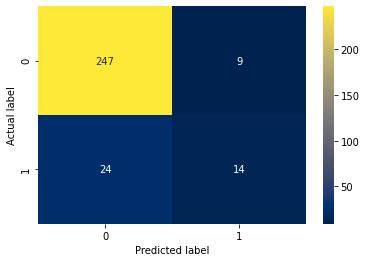

In [114]:
matrix = confusion_matrix(y_test, pred)

sns.heatmap(pd.DataFrame(matrix), annot = True, fmt='g', cmap = 'cividis')
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

### KFold

In [115]:
kfold = KFold(n_splits=10)
modelCV = LogisticRegression(solver='liblinear',
                             class_weight="balanced", 
                             random_state=7)
scoring = 'roc_auc'
results = cross_val_score(
    modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("AUC score (STD): %.2f (%.2f)" % (results.mean(), results.std()))

AUC score (STD): 0.77 (0.05)


# Descriptive Analysis

## Dependent Variable

In [16]:
df1['Attrition'].value_counts()

No     986
Yes    190
Name: Attrition, dtype: int64

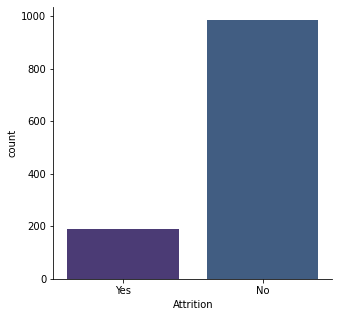

In [17]:
sns.set_palette("viridis")

plt.figure(figsize = (5,5))
sns.countplot(data = df1, x = 'Attrition')
sns.despine();

## Numerical Variables

In [18]:
# Selecting numerical variables
num_variables = df1.select_dtypes(include = ['int64', 'float64'])
num_variables.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,2,94,3,2,4,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,2,3,61,2,2,2,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,4,92,2,1,3,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,5,4,56,3,1,3,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,7,1,40,3,1,2,...,3,4,1,6,3,3,2,2,2,2


In [19]:
# add Attrition variable
num_variables = num_variables.merge(df1['Attrition'], left_index = True, right_index = True)

<ipython-input-20-b2c3321098c1>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize = (10, 5))


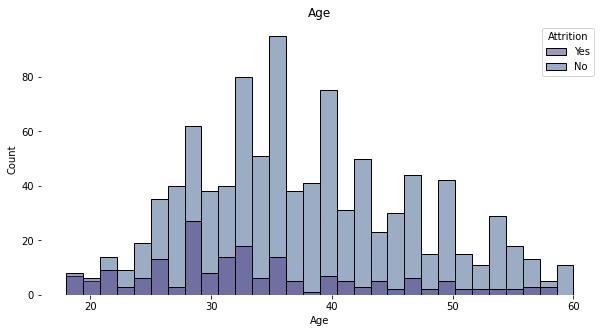

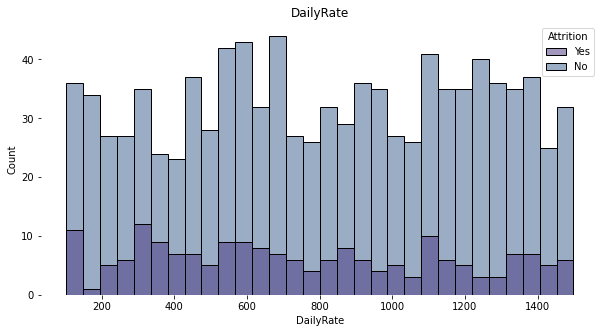

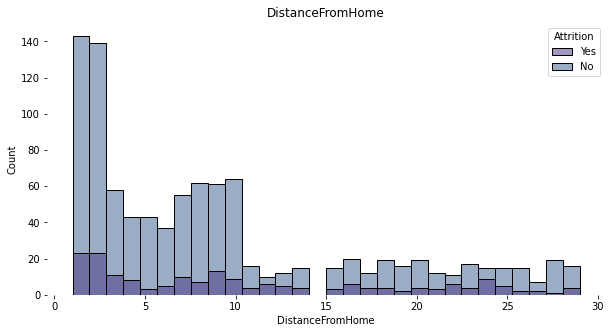

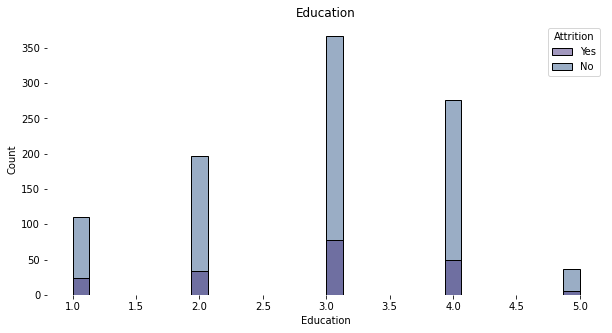

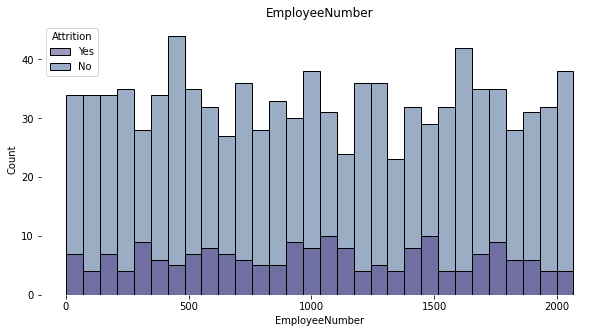

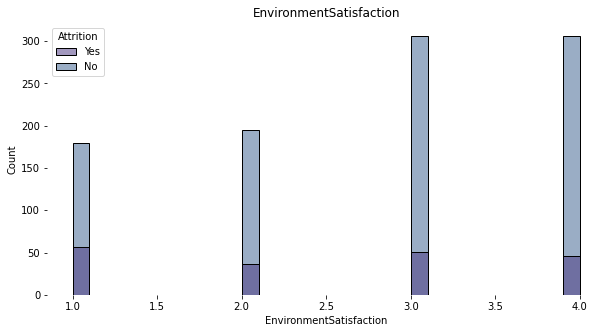

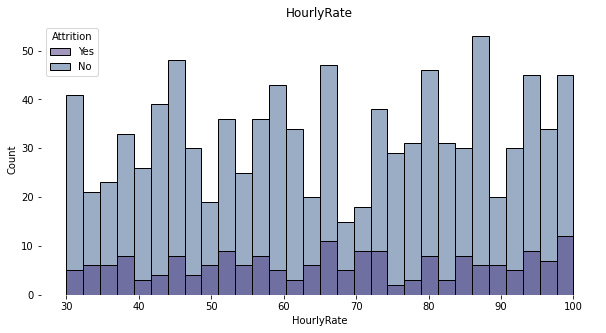

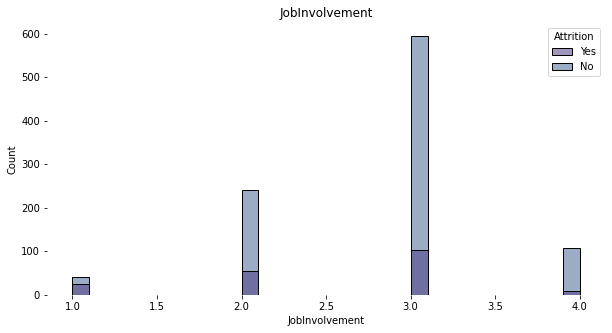

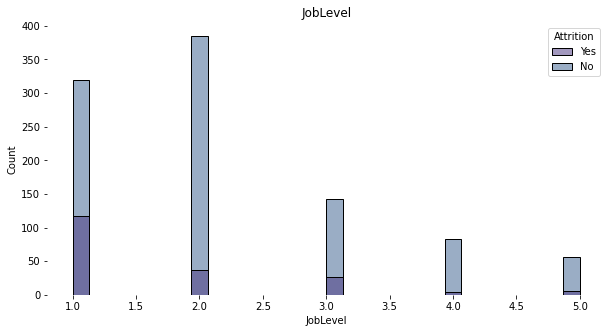

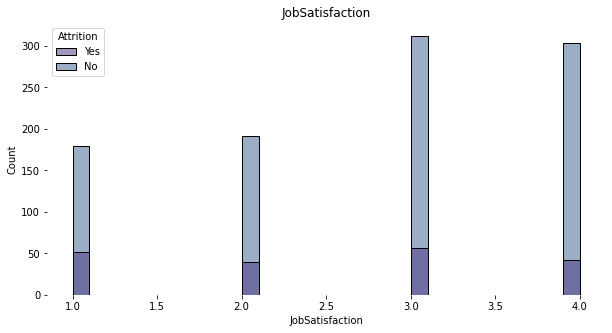

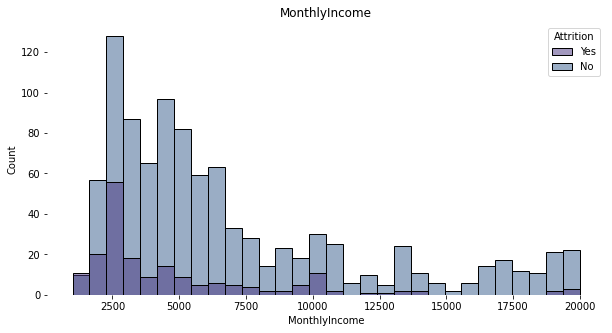

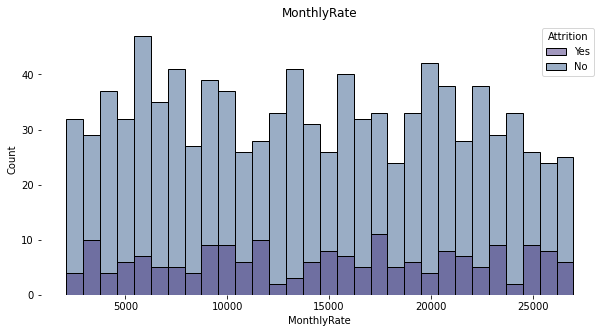

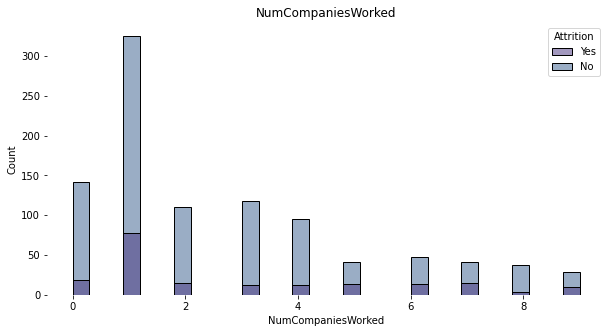

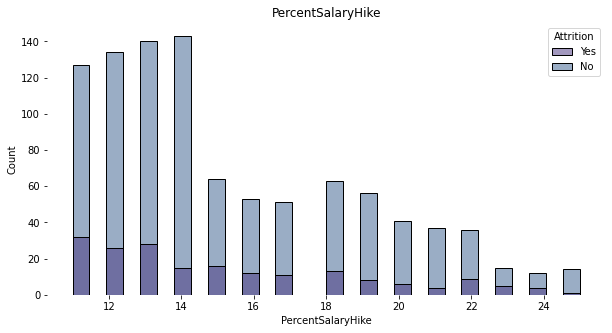

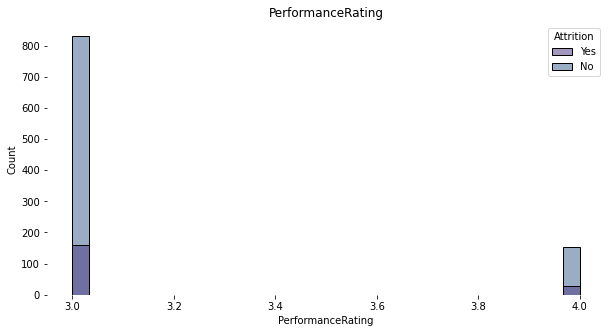

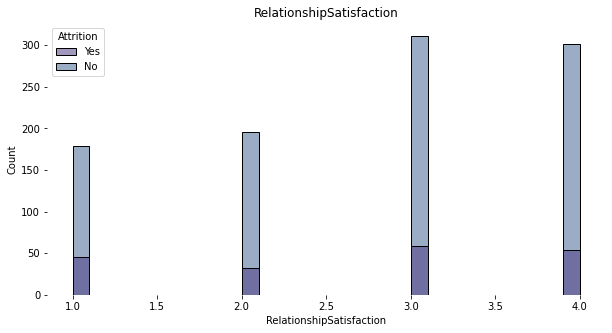

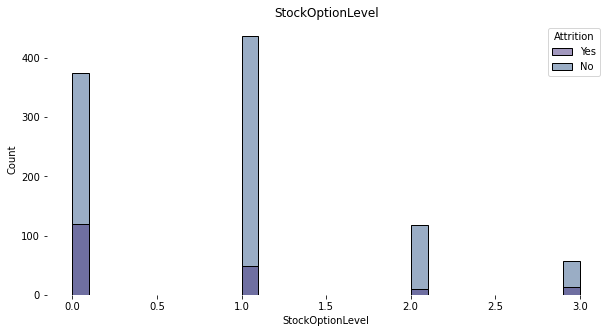

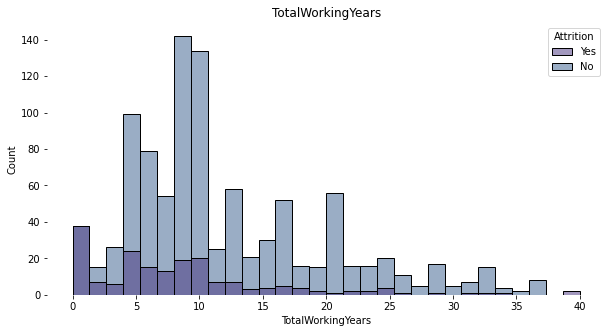

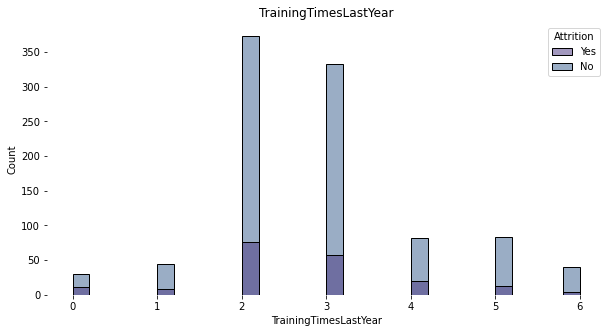

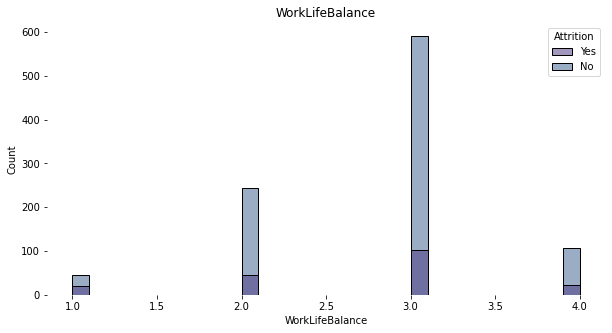

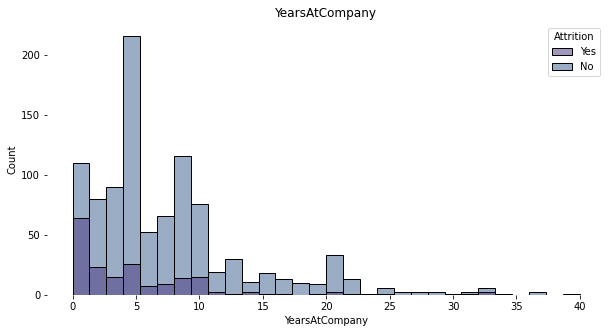

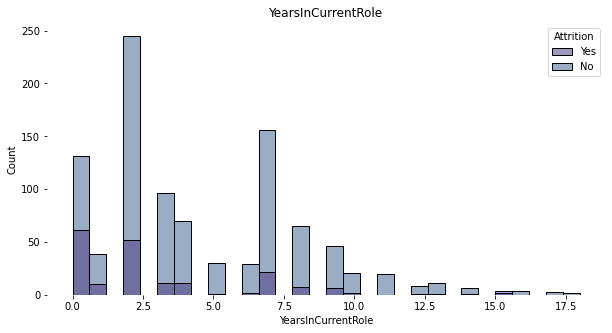

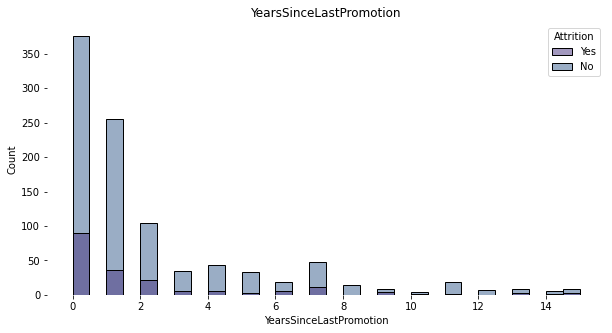

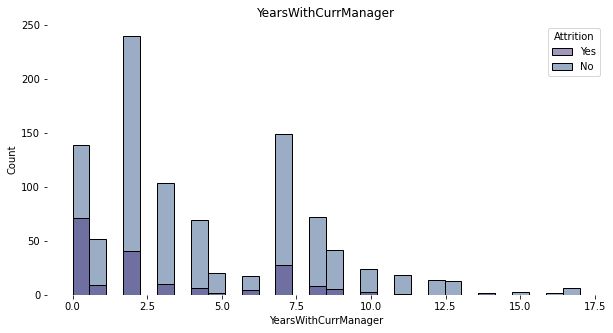

In [20]:
for n in num_variables.columns:
    if n != 'Attrition':
        sns.set_palette('viridis')

        plt.figure(figsize = (10, 5))
        sns.histplot(data = df1, x = n, hue = 'Attrition', bins = 30)
        sns.despine(bottom = True, left = True)
        plt.title(n)

***

**1. Age:**

Younger people, specially before 30 years old, quit job more often.

**2. Distance from Home**

There's many employees who live near from company's office who quit their job.


**3. Education:**

Employees with Bachelor degree tend to quit job more offen (based on absolute values. Need to analyze the percetage of this attribute)

**4. Job Level:**

Job level categorized in number one concentrate the major number of attritions.

**5. Monthly Income :**

Employees who have lower income tend to quit their jobs more often.

**6. Number of Companies Worked:**

People who had worked in only one company before tend to quit their currently job.

**7. Total Working Years**
Newer employees and people with few year experience quit job more ofeten.


***


In [21]:
num_variables1 = num_variables.drop(columns=(['Attrition']))

# Central Tendency
ct1 = pd.DataFrame(num_variables1.apply(np.mean)).T
ct2 = pd.DataFrame(num_variables1.apply(np.median)).T

# Dispersion
d1 = pd.DataFrame(num_variables1.apply(np.std)).T
d2 = pd.DataFrame(num_variables1.apply(min)).T
d3 = pd.DataFrame(num_variables1.apply(max)).T
d4 = pd.DataFrame(num_variables1.apply(lambda x: x.max() - x.min())).T

#concat
t = pd.concat([ct1, ct2, d1, d2, d3, d4]).T.reset_index()
t.columns = ['attribute', 'mean', 'median', 'std', 'min', 'max', 'range']
t

,attribute,mean,median,std,min,max,range
0,Age,36.954932,36.0,9.232568,18.0,60.0,42.0
1,DailyRate,800.825680,796.5,401.036134,102.0,1499.0,1397.0
2,DistanceFromHome,9.295918,7.0,8.082011,1.0,29.0,28.0
3,Education,2.921769,3.0,1.030489,1.0,5.0,4.0
4,EmployeeNumber,1027.652211,1017.5,599.484191,1.0,2068.0,2067.0
5,EnvironmentSatisfaction,2.701531,3.0,1.099721,1.0,4.0,3.0
6,HourlyRate,66.112245,66.0,20.590583,30.0,100.0,70.0
7,JobInvolvement,2.734694,3.0,0.710241,1.0,4.0,3.0
8,JobLevel,2.077381,2.0,1.127862,1.0,5.0,4.0
9,JobSatisfaction,2.704082,3.0,1.089928,1.0,4.0,3.0


### AGE

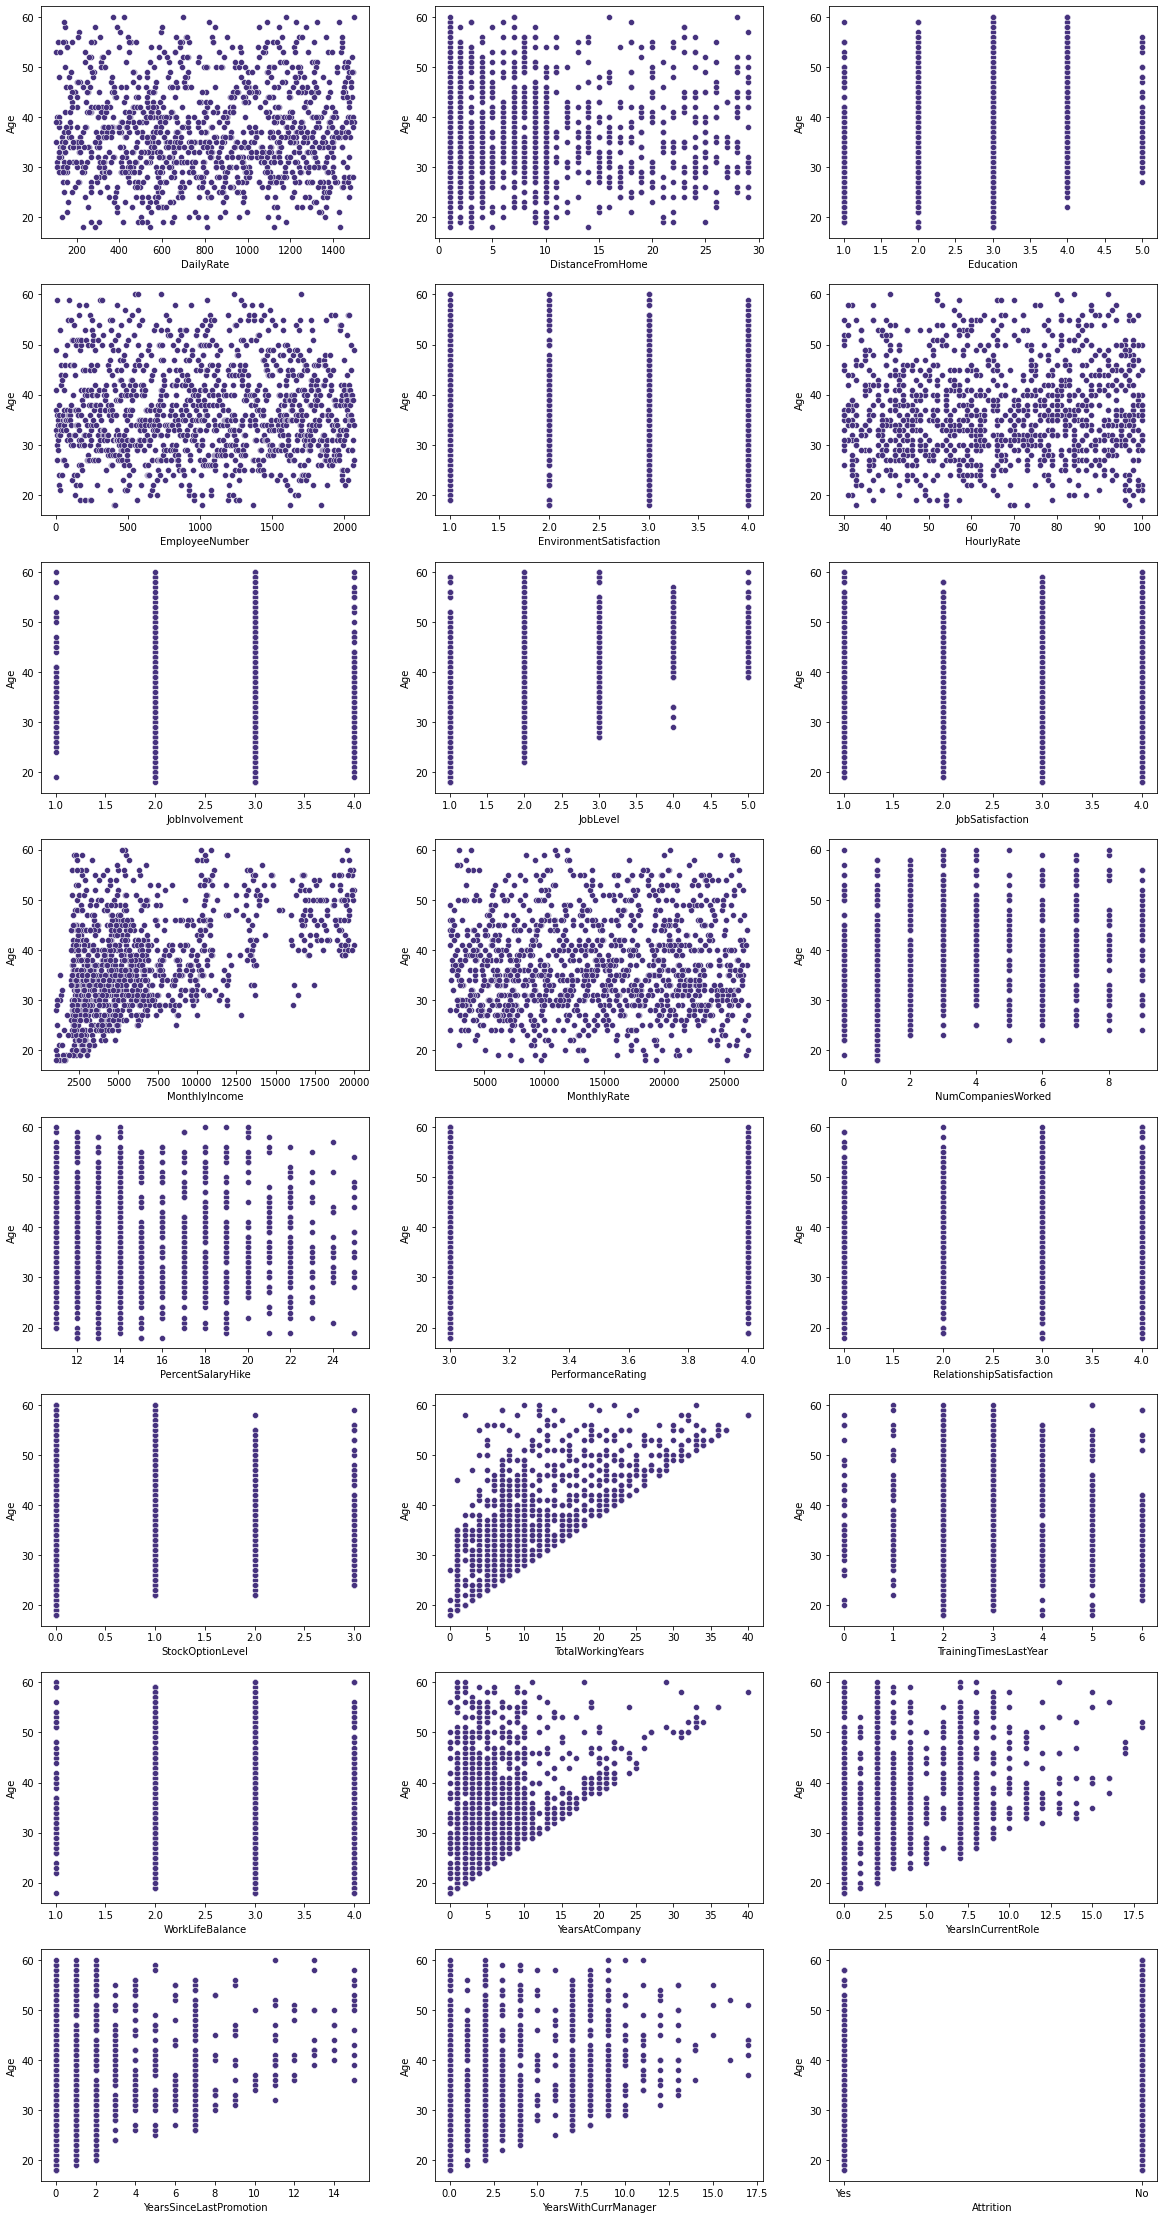

In [22]:
plt.figure(figsize = (20,40))
x = 1

for d in num_variables:
    if d != 'Age':
        sns.set_palette('viridis')
        plt.subplot(8, 3, x)
        sns.scatterplot(data = num_variables, x = d, y = 'Age')
        x += 1

### DistanceFromHome

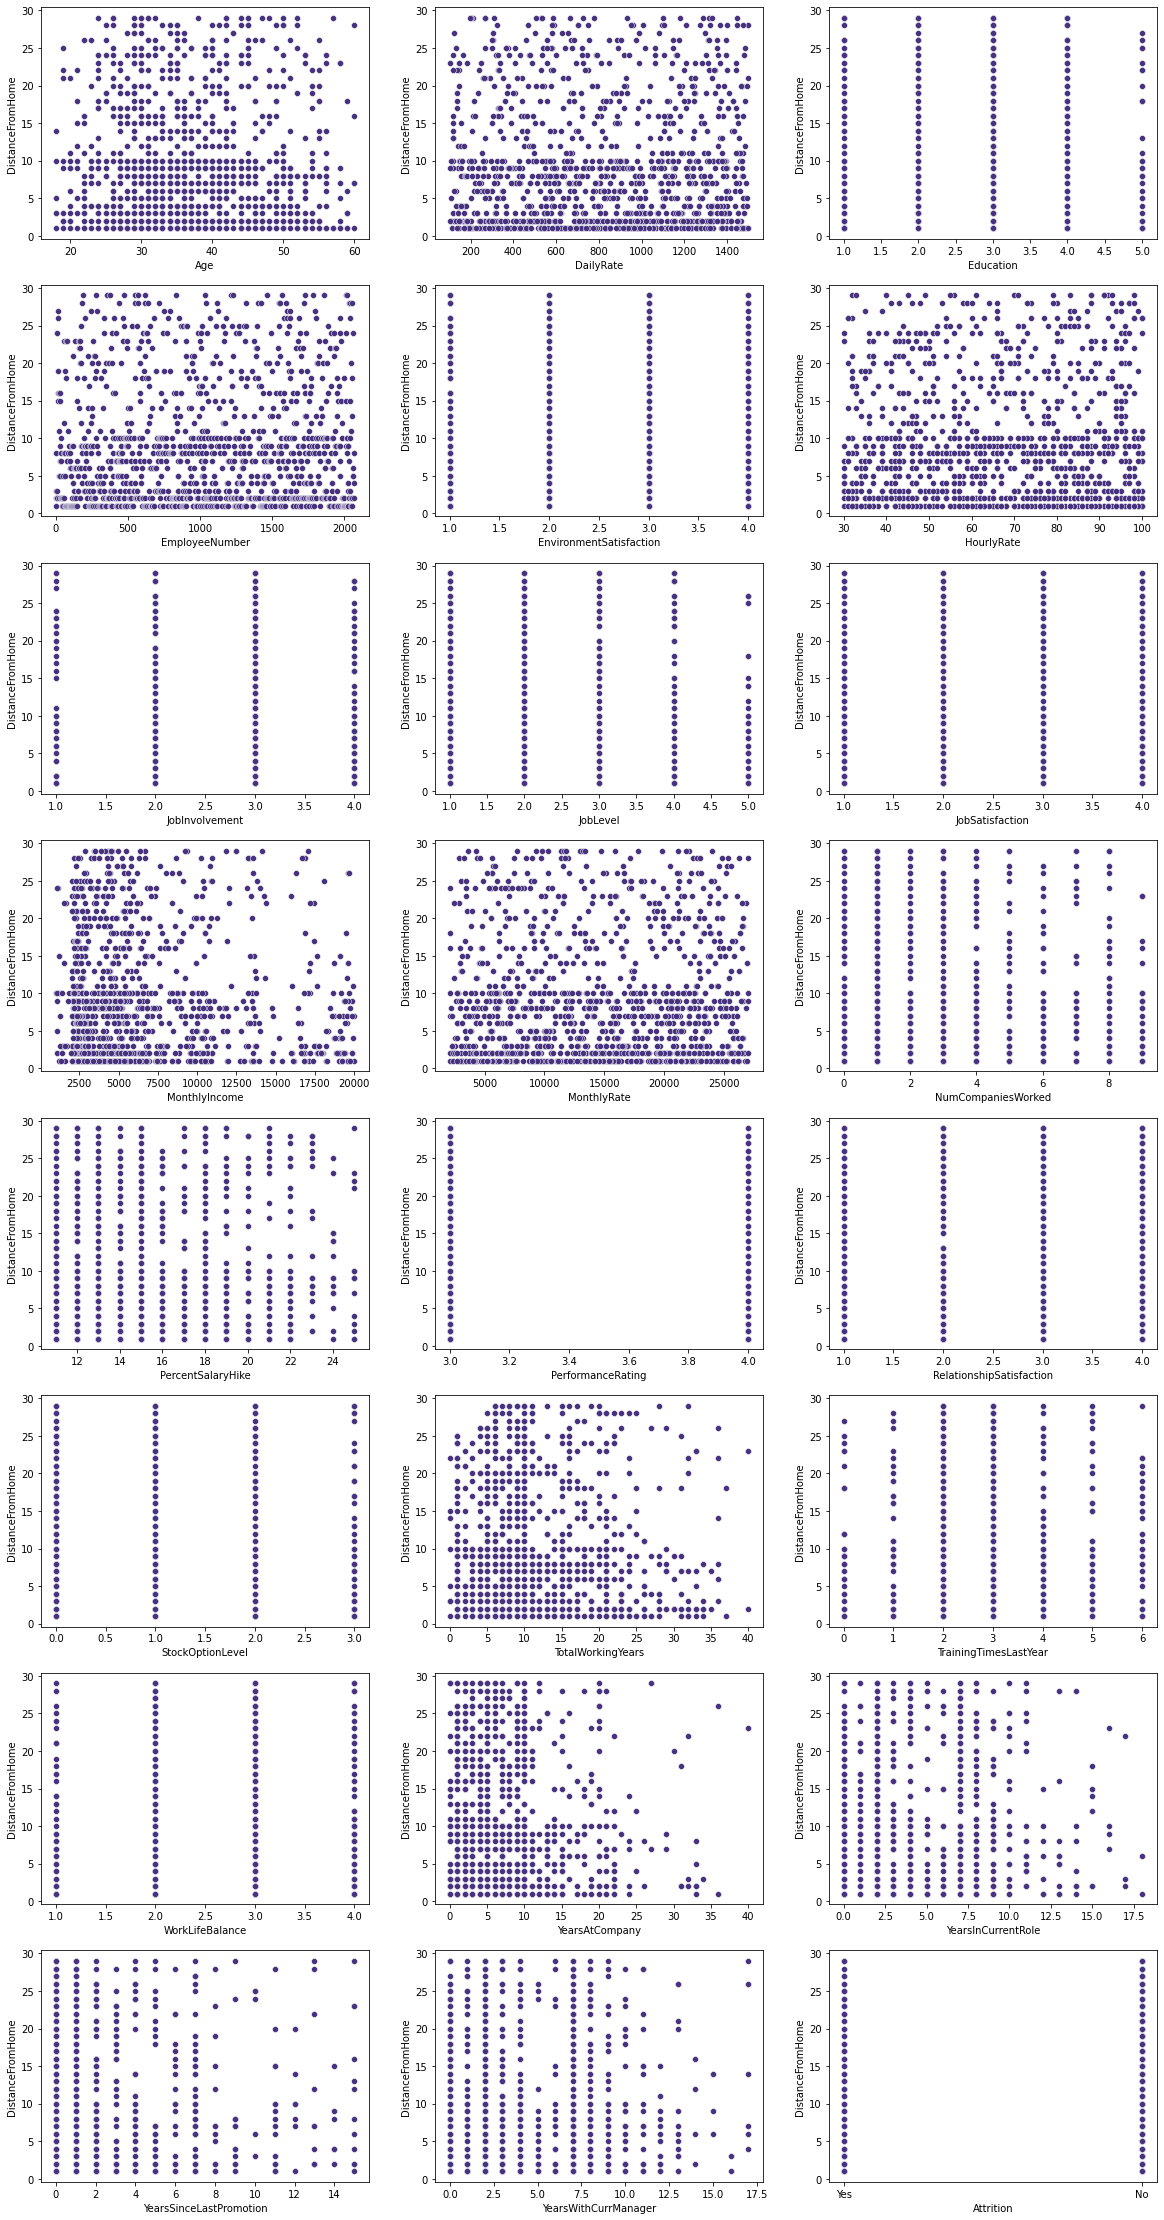

In [23]:
plt.figure(figsize = (20, 40))
x = 1

for d in num_variables:
    if d != 'DistanceFromHome':
        sns.set_palette('viridis')
        plt.subplot(8, 3, x)
        sns.scatterplot(data = num_variables, x = d, y = 'DistanceFromHome')
        x += 1


### MonthlyIncome

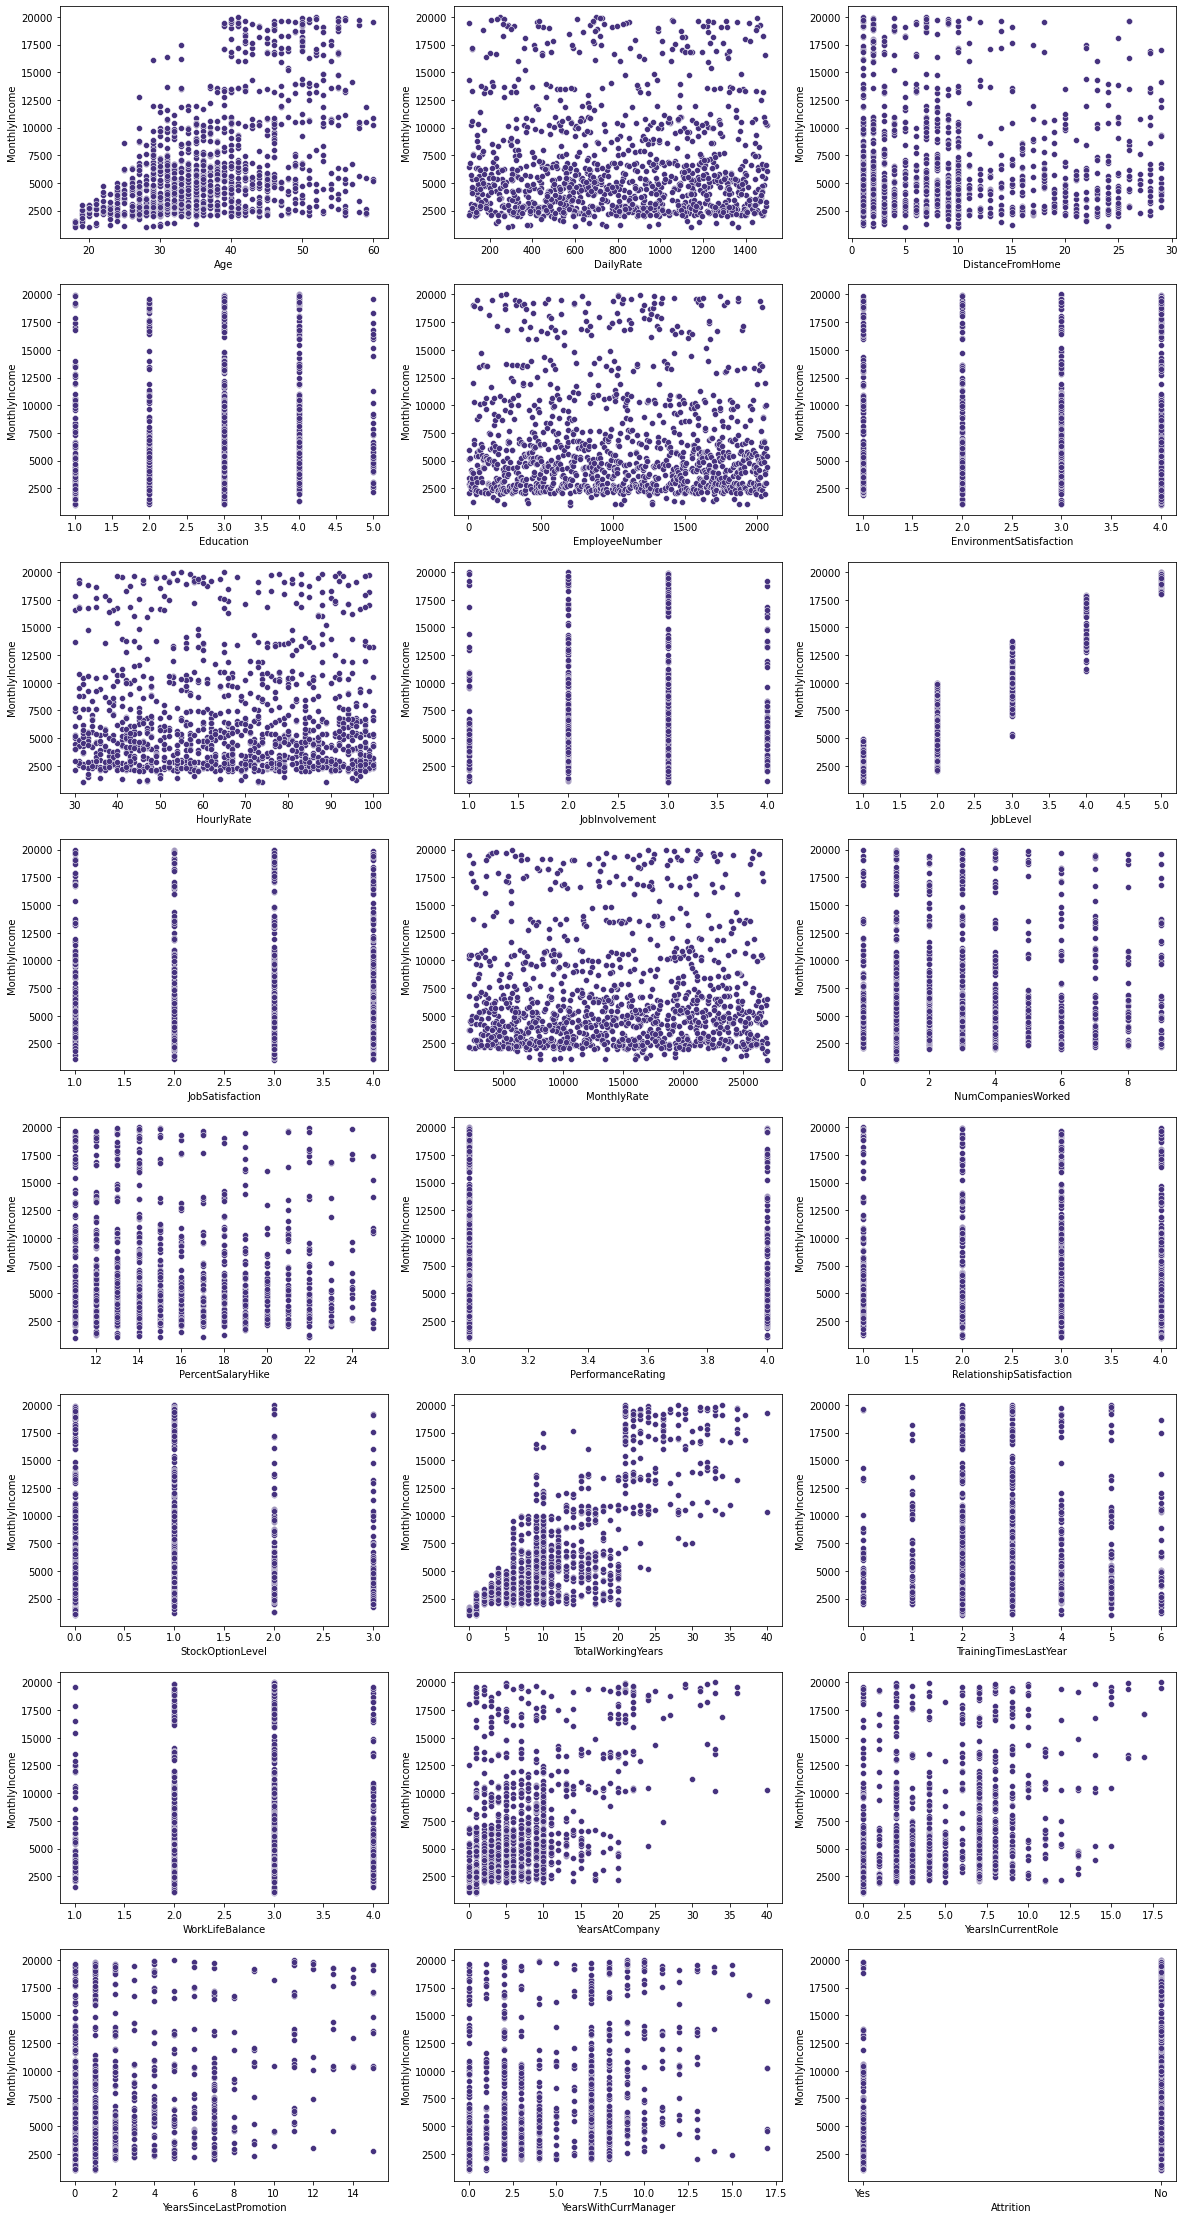

In [24]:
plt.figure(figsize = (20, 40))
x = 1

for d in num_variables:
    if d != 'MonthlyIncome':
        sns.set_palette('viridis')
        plt.subplot(8, 3, x)
        sns.scatterplot(data = num_variables, x = d, y = 'MonthlyIncome')
        x += 1


## Categorical Variables

In [25]:
# Selecting categoricla variables
cat_variables = df1.select_dtypes(exclude = ['int64', 'float64'])
cat_variables.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No


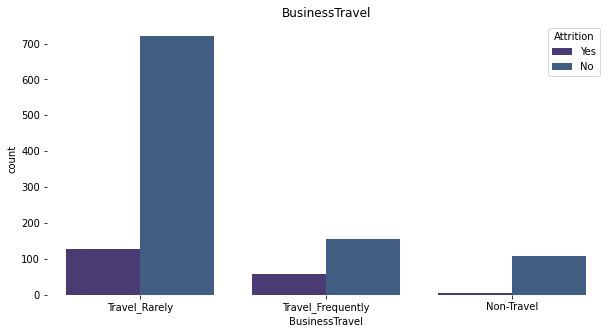

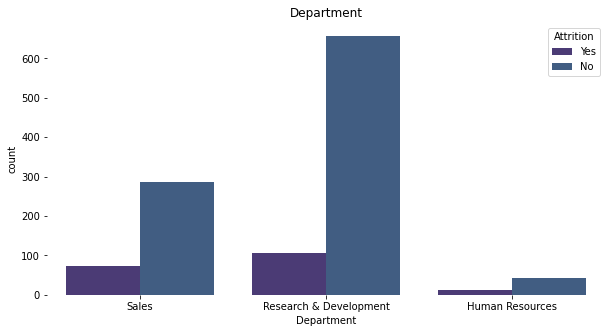

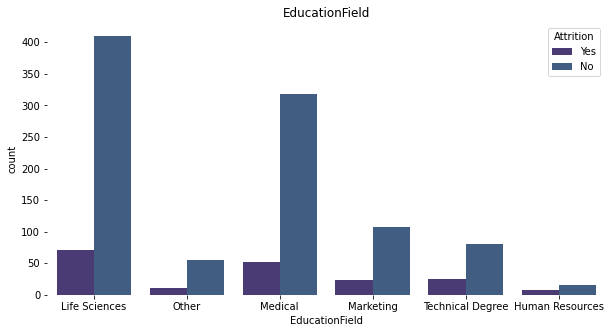

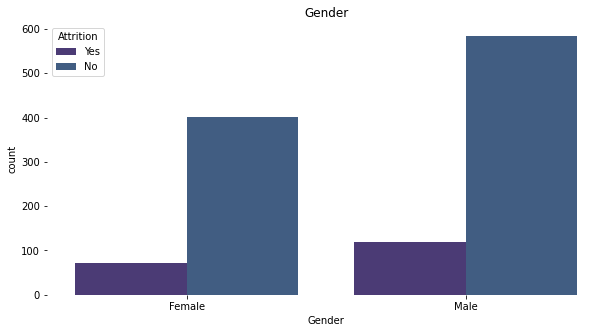

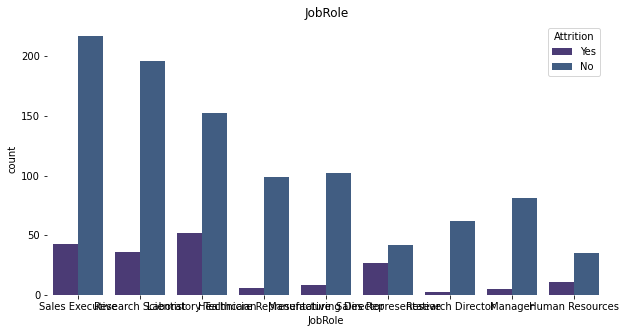

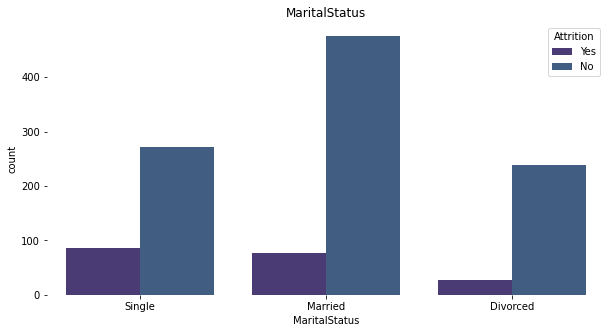

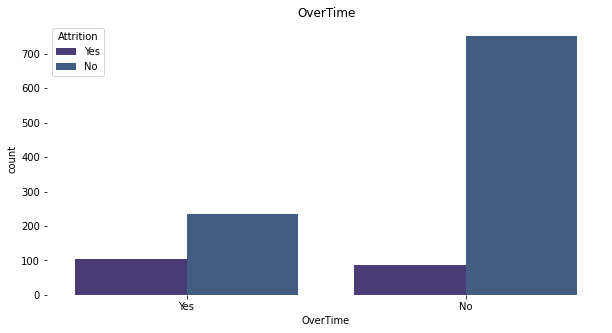

In [26]:
for d in cat_variables.columns:
    if d != 'Attrition':
        plt.figure(figsize=(10,5))
        sns.set_palette('viridis')
        sns.countplot(data = cat_variables, x = d, hue = 'Attrition')
        sns.despine(bottom = True, left = True)
        plt.title(d)

***

**1. Business Travel:**

People who travel more often have more attrition.

**2. Marital Status**

Single people quit their jobs more often.

***


## CATEGORICAL & NUMERICAL VARIABLES

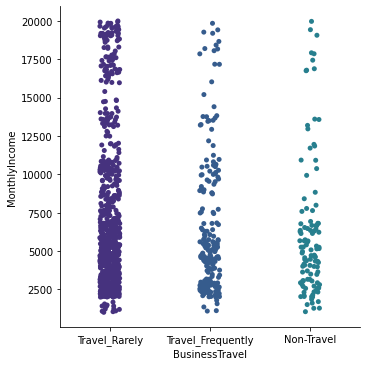

In [27]:
sns.catplot(data = df1, x = 'BusinessTravel', y = 'MonthlyIncome');

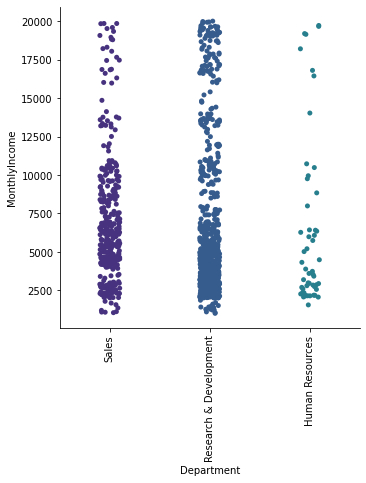

In [28]:
sns.catplot(data = df1, x = 'Department', y = 'MonthlyIncome')
plt.xticks(rotation = 90);

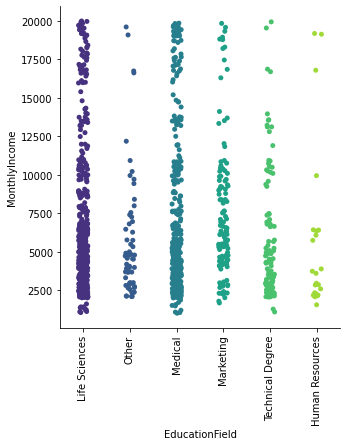

In [29]:
sns.catplot(data = df1, x = 'EducationField', y = 'MonthlyIncome')
plt.xticks(rotation = 90);

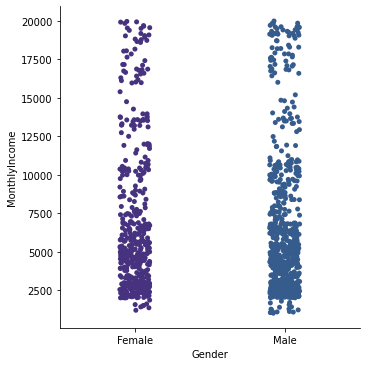

In [30]:
sns.catplot(data = df1, x = 'Gender', y = 'MonthlyIncome');

## CORRELATION

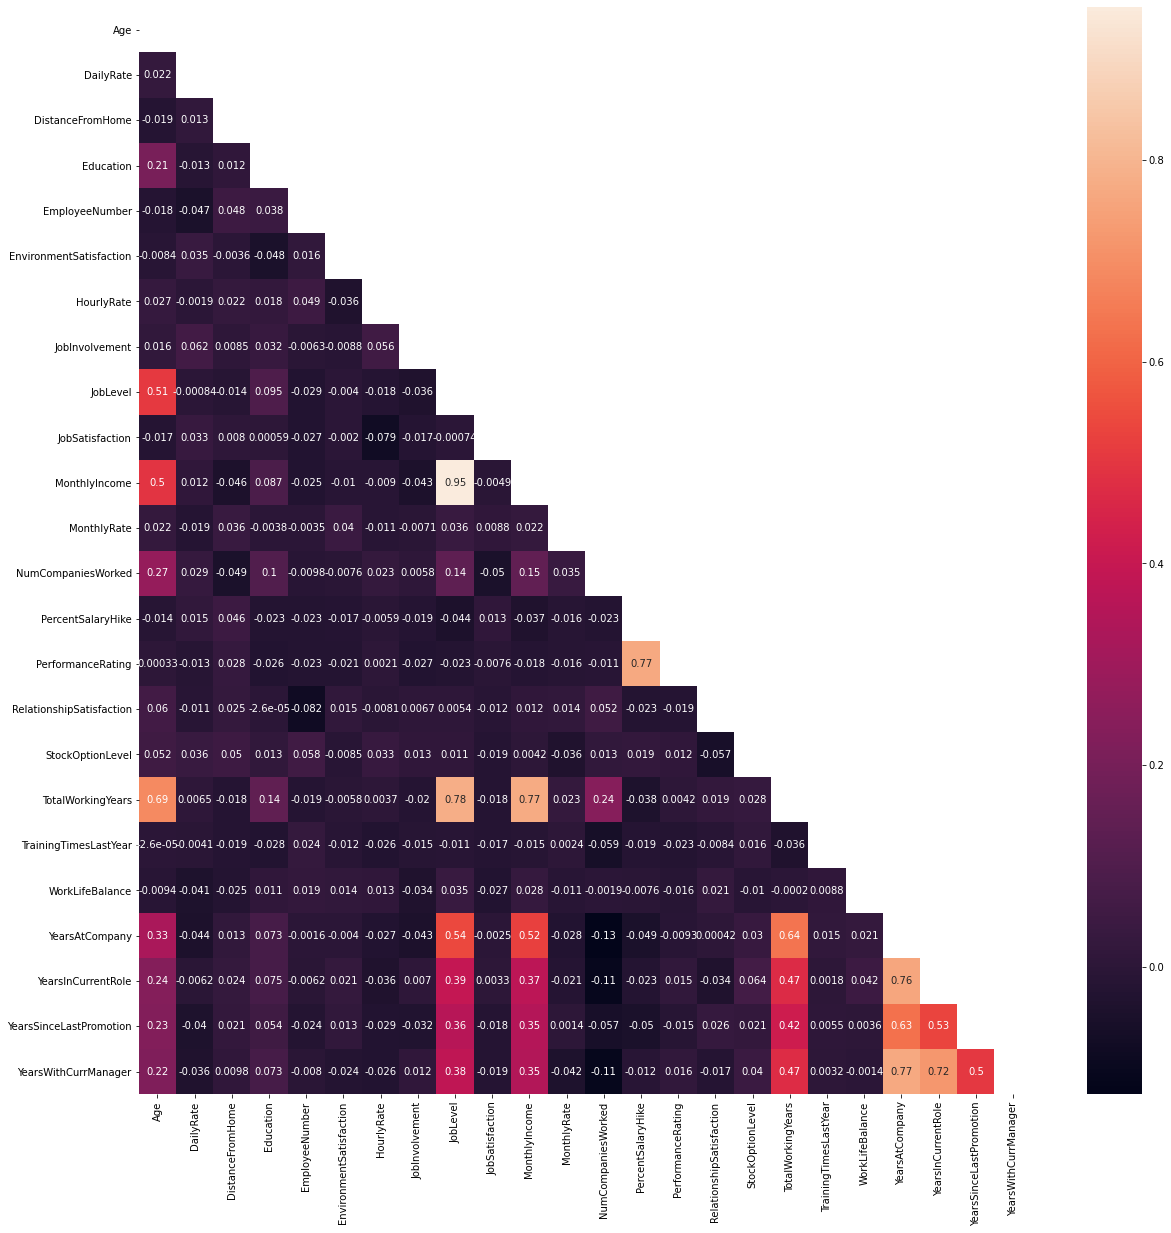

In [31]:

plt.figure(figsize= (20, 20))
sns.set_palette('viridis')
corr = num_variables.corr(method = 'pearson')
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.set_palette('viridis')
sns.heatmap(corr, mask = mask, annot= True);

Strong Correlation:

- MontlyIncome x JobLevel
- JobLebel x TotalWorkingYears
- TotalWorkingYears x Age
- JobLevel x YearsAtCompany
- TotalWorkingYears x YearAtCompany
- YearsCurrentRole x YearAtCompany
- YearsCurrentRole x YearAtCompany
- YearsSinceLastPromotion x YearsWithCurrManager


## MACHINE LEARNING II

In [116]:
df3 = df1.copy()

In [117]:
# drop cols
cols = ['DailyRate', 'HourlyRate','MonthlyRate','RelationshipSatisfaction','JobSatisfaction',
'TotalWorkingYears','Gender','OverTime','YearsInCurrentRole', 'EmployeeNumber']

#drop
df3 = df3.drop(columns=(cols))

#cat and numerical variables
cat = df3.select_dtypes(exclude = ['int64', 'float64'])
num = df3.select_dtypes(include = ['int64', 'float64'])

In [118]:
# label encoder for categorical variables
le = LabelEncoder()

for i in df3[cat.columns]:
    df3[i] = le.fit_transform(df3[i])
    


In [119]:
# checking range
rang = pd.DataFrame(num.apply(lambda x: x.max() - x.min()))
rang

,0
Age,42
DistanceFromHome,28
Education,4
EnvironmentSatisfaction,3
JobInvolvement,3
JobLevel,4
MonthlyIncome,18990
NumCompaniesWorked,9
PercentSalaryHike,14
PerformanceRating,1


In [120]:
# MinMaxScaler for 'MonthlyIncome' variables
mms = MinMaxScaler()
df3['MonthlyIncome'] = mms.fit_transform(df3[['MonthlyIncome']].values)

## Logistic Regression II

In [121]:
X = df3.drop(columns=(['Attrition']))
y = df3['Attrition'].ravel()

#split dataset
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, random_state = 42)

# model
LR02 = LogisticRegression(C= 1000, max_iter = 10000)
LR02.fit(X_train2, y_train2)
pred02 = LR02.predict(X_test2)

print('Logistic Regression:\n')
print('Traning Model accruracy score: {:.3f}'.format(LR02.score(X_train2,y_train2)))
print('Test Model accuracy score: {:.3f}'.format(LR02.score(X_test2,y_test2)))


Logistic Regression:

Traning Model accruracy score: 0.834
Test Model accuracy score: 0.901


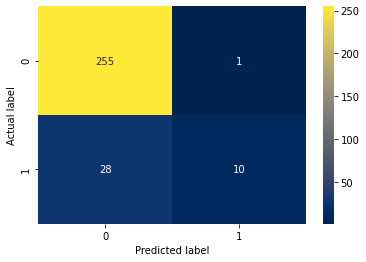

In [107]:
matrix02 = confusion_matrix(y_test, pred02)

sns.heatmap(pd.DataFrame(matrix02), annot = True, fmt = 'g', cmap = 'cividis')
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

### KFold

In [110]:
kfold02 = KFold(n_splits=10)
modelCV02 = LogisticRegression(solver='liblinear',
                             class_weight="balanced", 
                             random_state=7)
scoring = 'roc_auc'
results02 = cross_val_score(
    modelCV02, X_train, y_train, cv=kfold, scoring=scoring)

print("AUC score (STD): %.2f (%.2f)" % (results02.mean(), results02.std()))

AUC score (STD): 0.77 (0.05)
AUC score (STD): 0.70 (0.07)


# COMPARING

In [124]:
print('Logistic Regression 01:\n')
print('Traning Model accruracy score: {:.3f}'.format(LR.score(X_train,y_train)))
print('Test Model accuracy score: {:.3f}'.format(LR.score(X_test,y_test)))

print('\n--------------------\n')

print('Logistic Regression 02:\n')
print('Traning Model accruracy score: {:.3f}'.format(LR02.score(X_train2,y_train2)))
print('Test Model accuracy score: {:.3f}'.format(LR02.score(X_test2,y_test2)))


Logistic Regression 01:

Traning Model accruracy score: 0.871
Test Model accuracy score: 0.888

--------------------

Logistic Regression 02:

Traning Model accruracy score: 0.834
Test Model accuracy score: 0.901


In [125]:
kfold02 = KFold(n_splits=10)
modelCV02 = LogisticRegression(solver='liblinear',
                             class_weight="balanced", 
                             random_state=7)
scoring = 'roc_auc'
results02 = cross_val_score(
    modelCV02, X_train2, y_train2, cv=kfold, scoring=scoring)

print("AUC score (STD): %.2f (%.2f)" % (results.mean(), results.std()))
print("AUC score (STD): %.2f (%.2f)" % (results02.mean(), results02.std()))

AUC score (STD): 0.77 (0.05)
AUC score (STD): 0.70 (0.07)
